In [93]:
import pandas as pd
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [94]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
from pyspark.sql import SparkSession
from datetime import date

#create API connection and authenticate
api = KaggleApi()
api.authenticate()

#download dataset 
api.dataset_download_file('deepcontractor/monkeypox-dataset-daily-updated','Daily_Country_Wise_Confirmed_Cases.csv')

#create spark session
# spark = SparkSession.builder.getOrCreate()

#create spark df
daily_df = spark.read.csv('Daily_Country_Wise_Confirmed_Cases.csv', header=True)

def date_check():
    today = date.today()
    return str(today)

def column_grab():
    try:
        return daily_df.select(daily_df[date_check()]).show()
    except:
        pass

column_grab()

In [95]:
# DATA CLEANING
from pyspark.sql.types import IntegerType

daily_df = spark.read.csv("../data/Daily_Country_Wise_Confirmed_Cases.csv", header=True)
worldwide_df = spark.read.csv("../data/Monkey_Pox_Cases_Worldwide.csv", header=True)
timeline_df = spark.read.csv("../data/Worldwide_Case_Detection_Timeline.csv", header=True)
# daily_df.show(10)
# daily_df.describe()
# len(daily_df.columns)
worldwide_df.columns
worldwide_df.show(2)
worldwide_df = worldwide_df.withColumns({"Confirmed_Cases": worldwide_df["Confirmed_Cases"].cast(IntegerType()), "Suspected_Cases": worldwide_df["Suspected_Cases"].cast(IntegerType()), "Hospitalized": worldwide_df["Hospitalized"].cast(IntegerType()), "Travel_History_Yes": worldwide_df["Travel_History_Yes"].cast(IntegerType()), "Travel_History_No": worldwide_df["Travel_History_No"].cast(IntegerType())})
worldwide_df.show(2)
# timeline_df = timeline_df.fillna({"Age": "unknown", "Gender": "unknown", "Symptoms": "unknown", "Hospitalised (Y/N/NA)": "NA", "Isolated (Y/N/NA)": "NA", "Travel_History (Y/N/NA)": "NA"})
# timeline_df.show(30)

+--------+---------------+---------------+------------+------------------+-----------------+
| Country|Confirmed_Cases|Suspected_Cases|Hospitalized|Travel_History_Yes|Travel_History_No|
+--------+---------------+---------------+------------+------------------+-----------------+
| England|         1035.0|            0.0|         5.0|               2.0|              7.0|
|Portugal|          402.0|            0.0|         0.0|               0.0|             34.0|
+--------+---------------+---------------+------------+------------------+-----------------+
only showing top 2 rows

+--------+---------------+---------------+------------+------------------+-----------------+
| Country|Confirmed_Cases|Suspected_Cases|Hospitalized|Travel_History_Yes|Travel_History_No|
+--------+---------------+---------------+------------+------------------+-----------------+
| England|           1035|              0|           5|                 2|                7|
|Portugal|            402|              0|   

In [97]:


daily_df2 = daily_df.withColumn("2022-07-05", (daily_df["2022-06-30"] + 10).cast(IntegerType()))
daily_df2.select("country", "2022-06-30").show(6)
new_col = daily_df2.select("2022-07-05")

# daily_df.columns
# daily_df2.columns
new_col.show(6)

+-------------+----------+
|      country|2022-06-30|
+-------------+----------+
|      England|         0|
|     Portugal|        11|
|        Spain|         0|
|United States|         0|
|      Germany|        95|
|      Belgium|         0|
+-------------+----------+
only showing top 6 rows

+----------+
|2022-07-05|
+----------+
|        10|
|        21|
|        10|
|        10|
|       105|
|        10|
+----------+
only showing top 6 rows



['England', 'Germany', 'Spain', 'France', 'Portugal']
[1035, 969, 800, 440, 402]


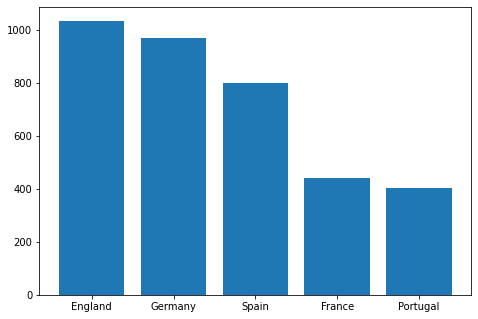

In [98]:
# Data Visualizations
from matplotlib import pyplot as plt

# worldwide_df.select("Country", "Confirmed_Cases").show(10)
worldwide_df.createOrReplaceTempView("worldwide_cases")
top5countries = spark.sql("SELECT Country FROM worldwide_cases ORDER BY Confirmed_Cases DESC LIMIT 5")
top5countries_cases = spark.sql("SELECT Confirmed_Cases FROM worldwide_cases ORDER BY Confirmed_Cases DESC LIMIT 5")
# top5countries.show()
# top5countries_cases.show()
# top5countries.collect()
# top5countries_cases.collect()
top5countries = top5countries.collect()
top5countries_cases = top5countries_cases.collect()
# print(top5countries)
# print(top5countries_cases)

top_countries_list = []
for row in top5countries:
    for country in row:
        top_countries_list.append(country)
print(top_countries_list)

top_cases_list = []
for row in top5countries_cases:
    for case in row:
        top_cases_list.append(case)
print(top_cases_list)

# graph of the 5 countries with highest monkey pox cases 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(top_countries_list, top_cases_list)
plt.show()

In [119]:
daily_df.columns
daily_df.createOrReplaceTempView("daily_cases")
england_df = spark.sql("SELECT * FROM daily_cases WHERE Country LIKE 'England' ")
england_df.show()
daily_df.filter(daily_df.Country == "England").collect()

+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|Country|2022-05-06|2022-05-12|2022-05-13|2022-05-15|2022-05-17|2022-05-18|2022-05-19|2022-05-20|2022-05-21|2022-05-23|2022-05-24|2022-05-25|2022-05-26|2022-05-27|2022-05-28|2022-05-29|2022-05-30|2022-05-31|2022-06-01|2022-06-02|2022-06-03|2022-06-04|2022-06-06|2022-06-07|2022-06-08|2022-06-09|2022-06-10|2022-06-11|2022-06-12|2022-06-13|2022-06-14|2022-06-15|2022-06-16|2022-06-17|2022-06-18|2022-06-19|2022-06-20|2022-06-21|2022-06-22|2022-06-23|2022-06-24|2022-06-25|20

[Row(Country='England', 2022-05-06='1', 2022-05-12='1', 2022-05-13='1', 2022-05-15='4', 2022-05-17='0', 2022-05-18='2', 2022-05-19='0', 2022-05-20='11', 2022-05-21='0', 2022-05-23='36', 2022-05-24='14', 2022-05-25='7', 2022-05-26='24', 2022-05-27='0', 2022-05-28='0', 2022-05-29='0', 2022-05-30='71', 2022-05-31='11', 2022-06-01='5', 2022-06-02='11', 2022-06-03='15', 2022-06-04='0', 2022-06-06='73', 2022-06-07='18', 2022-06-08='0', 2022-06-09='43', 2022-06-10='0', 2022-06-11='0', 2022-06-12='104', 2022-06-13='0', 2022-06-14='52', 2022-06-15='0', 2022-06-16='46', 2022-06-17='0', 2022-06-18='0', 2022-06-19='0', 2022-06-20='216', 2022-06-21='0', 2022-06-22='0', 2022-06-23='0', 2022-06-24='107', 2022-06-25='0', 2022-06-26='162', 2022-06-27='0', 2022-06-28='0', 2022-06-29='0', 2022-06-30='0')]